In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D #Для отрисовки 3Д проэкции

matplotlib.rc("font", size = 18) #для увелечения шрифта

In [3]:
#Загружаем данные
houses = pd.read_csv("1.4_houses.csv")

In [4]:
houses.head(15)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0
7,23,14,medium,998.0
8,9,5,basic,225.0
9,29,26,luxury,2052.0


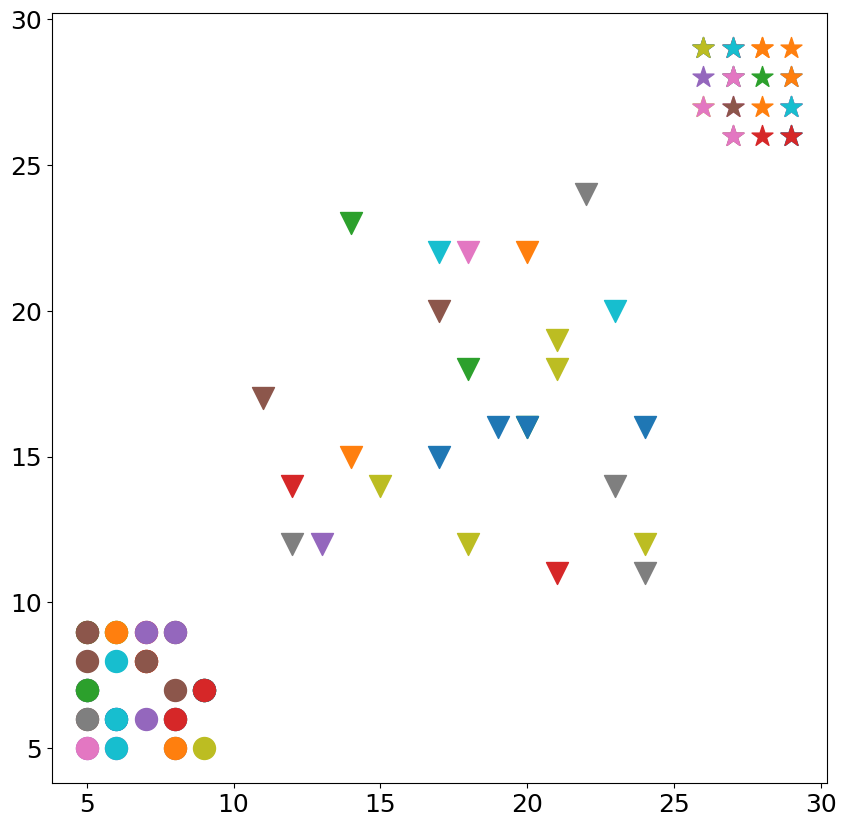

In [6]:
fig = plt.figure(figsize=(10,10)) ##Создаем картинку

maerkers = {"basic":"o","medium":"v","luxury":"*"}
for d1,d2,l in zip(houses.dim_1,houses.dim_2,houses.level):
    plt.scatter(d1,d2, s=250,marker=maerkers[l])

##отображаем картинку
plt.show()


In [7]:
#Импортируем модуль, отвечающий за кластеризацию
from sklearn.cluster import KMeans

In [8]:
## Выгружаем признаки в отдельную переменную
X=houses[["dim_1","dim_2"]]
##Создаем модель для кластеризации
clust=KMeans(n_clusters=3).fit(X)

/home/r/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
clust.cluster_centers_

array([[ 6.76744186,  7.1627907 ],
       [27.42424242, 27.51515152],
       [18.5       , 16.45833333]])

In [9]:
## Смотрим центры кластеров
[c1,c2,c3]=clust.cluster_centers_

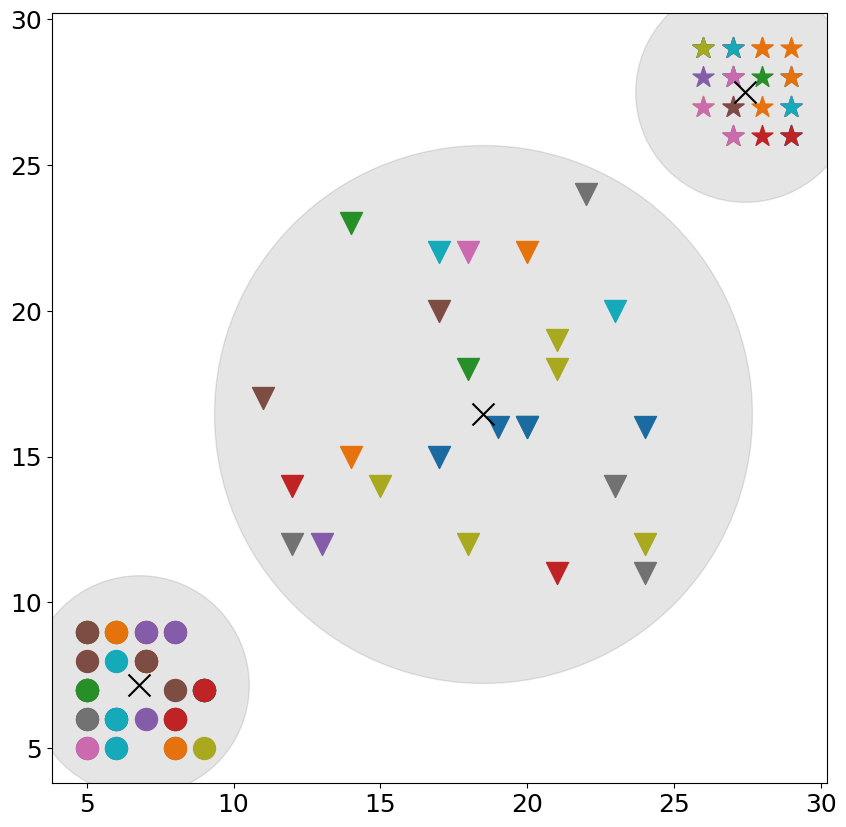

In [30]:
fig=plt.figure(figsize=(10,10))## создаем картинку
maerkers = {"basic":"o","medium":"v","luxury":"*"}
for d1,d2,l in zip(houses.dim_1,houses.dim_2,houses.level):
    plt.scatter(d1,d2, s=250,marker=maerkers[l])
## Добавляем информацию о центрах кластеров
plt.scatter(c1[0],c1[1],s=250,marker="x",c="black")
plt.scatter(c1[0],c1[1],s=250*1e2,c="black",alpha=0.1)

plt.scatter(c2[0],c2[1],s=250,marker="x",c="black")
plt.scatter(c2[0],c2[1],s=250*1e2,c="black",alpha=0.1)

plt.scatter(c3[0],c3[1],s=250,marker="x",c="black")
plt.scatter(c3[0],c3[1],s=250*6e2,c="black",alpha=0.1)

#Отображаем картинку
plt.show()
